In [1]:
from sklearn.datasets import make_blobs

X,y= make_blobs(n_samples=150,
                n_features=2,
                centers=3,
                cluster_std=0.5,
                shuffle=True,
                random_state=0)

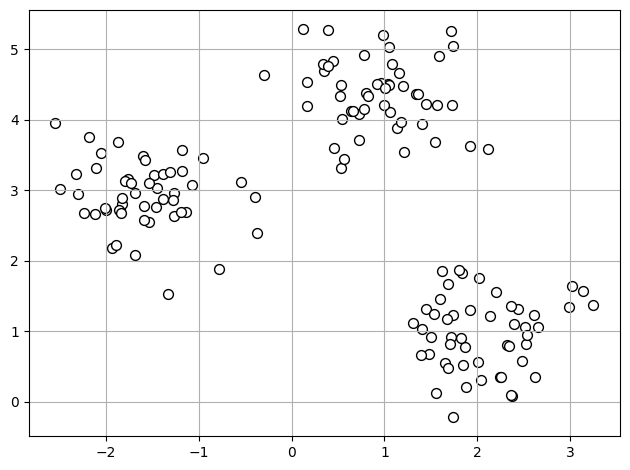

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c='white',
            marker='o',
            edgecolor='black',
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,
          init='random',
          n_init=10,
          max_iter=300,
          tol=1e-04,
          random_state=0)

y_km=km.fit_predict(X)

Let's now visualize the clusters that k-means identified
in the dataset together with the cluster centroids.

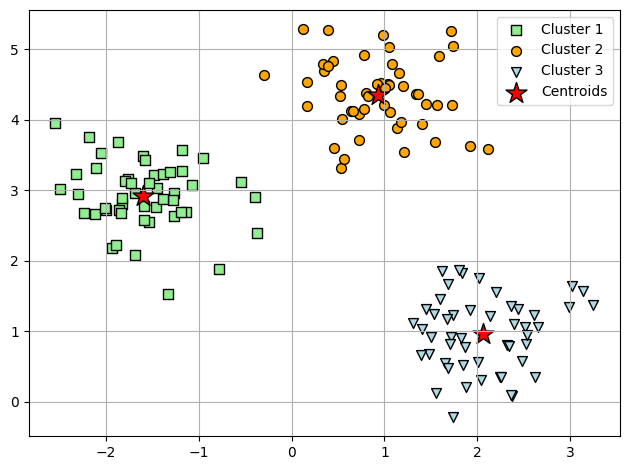

In [4]:
plt.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            s=50, c='lightgreen',
            marker='s',
            edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            edgecolor='black',
            label='Cluster 2')

plt.scatter(X[y_km==2,0],
            X[y_km==2,1],
            s=50,
            c='lightblue',
            marker='v',
            edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

whithin cluster SSE

In [5]:
km.inertia_

72.47601670996696

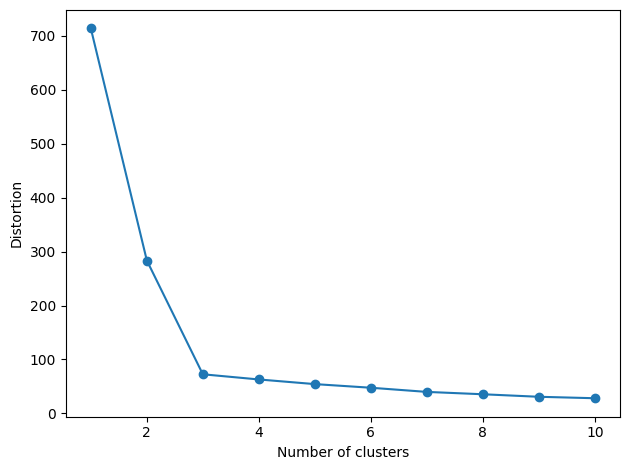

In [6]:
distortions=[]
for i in range(1,11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# **siloutte plot**

In [9]:
km=KMeans(n_clusters=3,
          init='k-means++',
          n_init=10,#This sets the number of times the k-means algorithm will be run with different centroid seeds
          max_iter=300,#maximum number of iterations for a single run
          tol=1e-04,
          random_state=0)

y_km=km.fit_predict(X)#this method returns an array which shows cluster of each sample

In [10]:
y_km

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

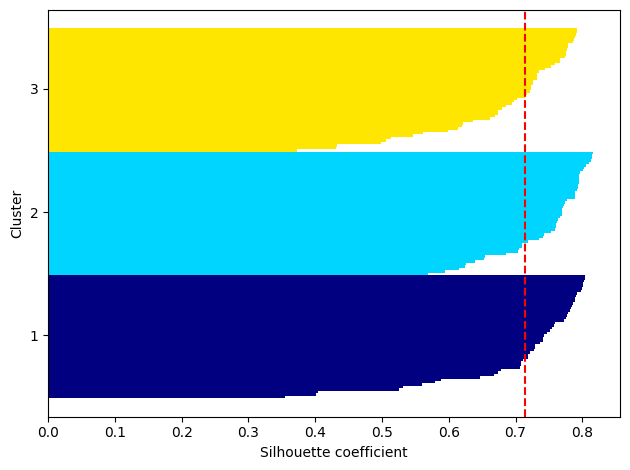

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels= np.unique(y_km)#[0,1,2] which is an array with the length equal to number of clusters
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(X, y_km, metric='euclidean')#returns an array with the length same to X which calculate silhouette coef for each data sample
y_ax_lower, y_ax_upper= 0, 0
yticks=[]
for i, c in enumerate(cluster_labels):
  c_silhouette_vals =  silhouette_vals[y_km == c]#silhouette coef for data tuples in one specific cluster
  c_silhouette_vals.sort()
  y_ax_upper+= len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)


silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

 To see what a silhouette plot looks like for a relatively bad clustering, let's seed the
k-means algorithm with only two centroids:

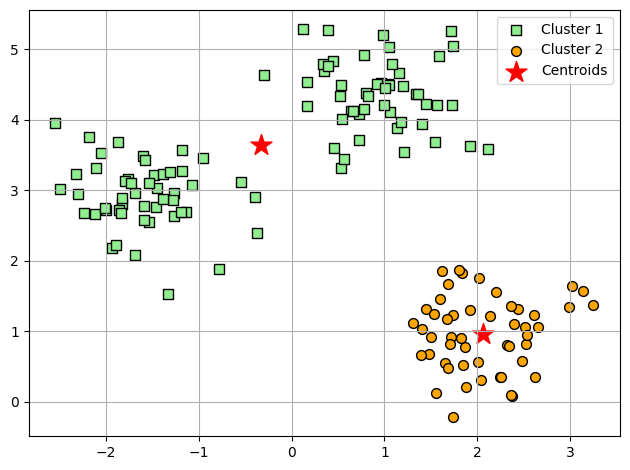

In [16]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

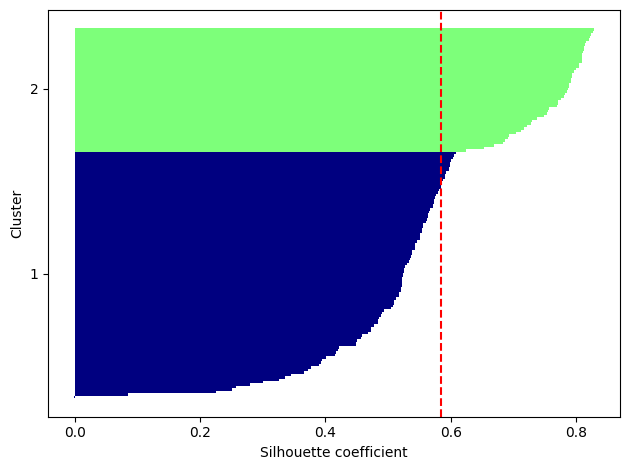

In [20]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()